<a href="https://colab.research.google.com/github/HJoon-K/Find_Dust/blob/yang/dust_yjh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import json

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# 경고 메세지 감춤
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/서울시 미세먼지.csv')
dt

시점 구분별(1) 미세먼지 (㎍/㎥) 초미세먼지 (㎍/㎥)
0     2016. 01    종로구         50          34
1     2016. 01     중구         48          23
2     2016. 01    용산구         41          28
3     2016. 01    성동구         52          26
4     2016. 01    광진구         54          36
...        ...    ...        ...         ...
1193  2019. 12    관악구         43          27
1194  2019. 12    서초구         47          30
1195  2019. 12    강남구         43          28
1196  2019. 12    송파구         36          22
1197  2019. 12    강동구         48         NaN

[1198 rows x 4 columns]

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   시점           1198 non-null   object
 1   구분별(1)       1198 non-null   object
 2   미세먼지 (㎍/㎥)   1198 non-null   object
 3   초미세먼지 (㎍/㎥)  1197 non-null   object
dtypes: object(4)
memory usage: 37.6+ KB


In [7]:
dt.columns = ['연월', '구별', '미세먼지 (㎍/㎥)', '초미세먼지 (㎍/㎥)']
dt['연월'] = dt['연월'].str.replace('. ', '')
dt['미세먼지 (㎍/㎥)'] = dt['미세먼지 (㎍/㎥)'].str.replace('-', '0')
dt['미세먼지 (㎍/㎥)'] = dt['미세먼지 (㎍/㎥)'].str.replace('－', '0')
dt['초미세먼지 (㎍/㎥)'] = dt['초미세먼지 (㎍/㎥)'].str.replace('-', '0')
dt['초미세먼지 (㎍/㎥)'] = dt['초미세먼지 (㎍/㎥)'].str.replace('－', '0')
dt['초미세먼지 (㎍/㎥)'].fillna(0, inplace=True)
dt.astype({'미세먼지 (㎍/㎥)':'int', '초미세먼지 (㎍/㎥)':'int'})
dt

연월   구별 미세먼지 (㎍/㎥) 초미세먼지 (㎍/㎥)
0     201601  종로구         50          34
1     201601   중구         48          23
2     201601  용산구         41          28
3     201601  성동구         52          26
4     201601  광진구         54          36
...      ...  ...        ...         ...
1193  201912  관악구         43          27
1194  201912  서초구         47          30
1195  201912  강남구         43          28
1196  201912  송파구         36          22
1197  201912  강동구         48           0

[1198 rows x 4 columns]

In [8]:
dt.to_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv', index=0)

In [9]:
dust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv')
dust

연월   구별  미세먼지 (㎍/㎥)  초미세먼지 (㎍/㎥)
0     201601  종로구          50           34
1     201601   중구          48           23
2     201601  용산구          41           28
3     201601  성동구          52           26
4     201601  광진구          54           36
...      ...  ...         ...          ...
1193  201912  관악구          43           27
1194  201912  서초구          47           30
1195  201912  강남구          43           28
1196  201912  송파구          36           22
1197  201912  강동구          48            0

[1198 rows x 4 columns]

In [10]:
ra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/서울시 도로 면적.csv')
ra

시점 자치구별(1) 자치구별(2)  도로면적 (㎢)  도로율 (%)
0    2016      합계     종로구      2.67    21.20
1    2016      합계      중구      1.88    18.82
2    2016      합계     용산구      3.14    22.06
3    2016      합계     성동구      3.02    23.07
4    2016      합계     광진구      3.39    28.44
..    ...     ...     ...       ...      ...
120  2020      합계     관악구      3.03    25.41
121  2020      합계     서초구      5.73    26.35
122  2020      합계     강남구      5.67    23.58
123  2020      합계     송파구      4.87    20.68
124  2020      합계     강동구      3.52    24.00

[125 rows x 5 columns]

In [11]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        125 non-null    int64  
 1   자치구별(1)   125 non-null    object 
 2   자치구별(2)   125 non-null    object 
 3   도로면적 (㎢)  125 non-null    float64
 4   도로율 (%)   125 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.0+ KB


In [12]:
ra.drop('자치구별(1)', axis=1, inplace=True)
ra

시점 자치구별(2)  도로면적 (㎢)  도로율 (%)
0    2016     종로구      2.67    21.20
1    2016      중구      1.88    18.82
2    2016     용산구      3.14    22.06
3    2016     성동구      3.02    23.07
4    2016     광진구      3.39    28.44
..    ...     ...       ...      ...
120  2020     관악구      3.03    25.41
121  2020     서초구      5.73    26.35
122  2020     강남구      5.67    23.58
123  2020     송파구      4.87    20.68
124  2020     강동구      3.52    24.00

[125 rows x 4 columns]

In [13]:
ra.columns = ['연도', '자치구별', '도로면적 (㎢)', '도로율 (%)']
ra

연도 자치구별  도로면적 (㎢)  도로율 (%)
0    2016  종로구      2.67    21.20
1    2016   중구      1.88    18.82
2    2016  용산구      3.14    22.06
3    2016  성동구      3.02    23.07
4    2016  광진구      3.39    28.44
..    ...  ...       ...      ...
120  2020  관악구      3.03    25.41
121  2020  서초구      5.73    26.35
122  2020  강남구      5.67    23.58
123  2020  송파구      4.87    20.68
124  2020  강동구      3.52    24.00

[125 rows x 4 columns]

In [14]:
ra.to_csv('/content/drive/MyDrive/Colab Notebooks/data/road_area.csv', index=False)

In [15]:
road_area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/road_area.csv')
road_area

연도 자치구별  도로면적 (㎢)  도로율 (%)
0    2016  종로구      2.67    21.20
1    2016   중구      1.88    18.82
2    2016  용산구      3.14    22.06
3    2016  성동구      3.02    23.07
4    2016  광진구      3.39    28.44
..    ...  ...       ...      ...
120  2020  관악구      3.03    25.41
121  2020  서초구      5.73    26.35
122  2020  강남구      5.67    23.58
123  2020  송파구      4.87    20.68
124  2020  강동구      3.52    24.00

[125 rows x 4 columns]

In [16]:
p = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/서울시 공원 면적.csv')
p

시점 자치구별(1) 자치구별(2) 공원종류별(1)  공원수 (개소)  면적 (천㎡)
0    2016      합계     종로구       합계       108    11567
1    2016      합계      중구       합계        70     3132
2    2016      합계     용산구       합계       101     1794
3    2016      합계     성동구       합계        82     3095
4    2016      합계     광진구       합계        55     3359
..    ...     ...     ...      ...       ...      ...
120  2020      합계     관악구       합계       113    12431
121  2020      합계     서초구       합계       181    15073
122  2020      합계     강남구       합계       162     7769
123  2020      합계     송파구       합계       173     4771
124  2020      합계     강동구       합계       125       33

[125 rows x 6 columns]

In [17]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        125 non-null    int64 
 1   자치구별(1)   125 non-null    object
 2   자치구별(2)   125 non-null    object
 3   공원종류별(1)  125 non-null    object
 4   공원수 (개소)  125 non-null    int64 
 5   면적 (천㎡)   125 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 6.0+ KB


In [18]:
p.drop(['자치구별(1)', '공원종류별(1)'], axis=1, inplace=True)
p

시점 자치구별(2)  공원수 (개소)  면적 (천㎡)
0    2016     종로구       108    11567
1    2016      중구        70     3132
2    2016     용산구       101     1794
3    2016     성동구        82     3095
4    2016     광진구        55     3359
..    ...     ...       ...      ...
120  2020     관악구       113    12431
121  2020     서초구       181    15073
122  2020     강남구       162     7769
123  2020     송파구       173     4771
124  2020     강동구       125       33

[125 rows x 4 columns]

In [19]:
p.columns = ['연도', '자치구별', '공원수', '면적 (㎡)']
p

연도 자치구별  공원수  면적 (㎡)
0    2016  종로구  108   11567
1    2016   중구   70    3132
2    2016  용산구  101    1794
3    2016  성동구   82    3095
4    2016  광진구   55    3359
..    ...  ...  ...     ...
120  2020  관악구  113   12431
121  2020  서초구  181   15073
122  2020  강남구  162    7769
123  2020  송파구  173    4771
124  2020  강동구  125      33

[125 rows x 4 columns]

In [20]:
p.to_csv('/content/drive/MyDrive/Colab Notebooks/data/park.csv', index=False)

In [21]:
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/park.csv')
park

연도 자치구별  공원수  면적 (㎡)
0    2016  종로구  108   11567
1    2016   중구   70    3132
2    2016  용산구  101    1794
3    2016  성동구   82    3095
4    2016  광진구   55    3359
..    ...  ...  ...     ...
120  2020  관악구  113   12431
121  2020  서초구  181   15073
122  2020  강남구  162    7769
123  2020  송파구  173    4771
124  2020  강동구  125      33

[125 rows x 4 columns]

In [23]:
pop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/서울시 인구.csv')
pop

시점 동별(1) 동별(2)  인구 (명)  인구밀도 (명/㎢)
0    2016    합계   종로구  161922        6771
1    2016    합계    중구  134409       13494
2    2016    합계   용산구  245102       11209
3    2016    합계   성동구  307161       18218
4    2016    합계   광진구  372104       21807
..    ...   ...   ...     ...         ...
120  2020    합계   관악구  509803       17241
121  2020    합계   서초구  429025        9132
122  2020    합계   강남구  544055       13773
123  2020    합계   송파구  673926       19896
124  2020    합계   강동구  463998         188

[125 rows x 5 columns]

In [24]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   시점          125 non-null    int64 
 1   동별(1)       125 non-null    object
 2   동별(2)       125 non-null    object
 3   인구 (명)      125 non-null    int64 
 4   인구밀도 (명/㎢)  125 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 5.0+ KB


In [25]:
pop.drop(['동별(1)'], axis=1, inplace=True)
pop

시점 동별(2)  인구 (명)  인구밀도 (명/㎢)
0    2016   종로구  161922        6771
1    2016    중구  134409       13494
2    2016   용산구  245102       11209
3    2016   성동구  307161       18218
4    2016   광진구  372104       21807
..    ...   ...     ...         ...
120  2020   관악구  509803       17241
121  2020   서초구  429025        9132
122  2020   강남구  544055       13773
123  2020   송파구  673926       19896
124  2020   강동구  463998         188

[125 rows x 4 columns]

In [26]:
pop.columns = ['연도', '구별', '인구 (명)', '인구밀도 (명/㎢)']
pop

연도   구별  인구 (명)  인구밀도 (명/㎢)
0    2016  종로구  161922        6771
1    2016   중구  134409       13494
2    2016  용산구  245102       11209
3    2016  성동구  307161       18218
4    2016  광진구  372104       21807
..    ...  ...     ...         ...
120  2020  관악구  509803       17241
121  2020  서초구  429025        9132
122  2020  강남구  544055       13773
123  2020  송파구  673926       19896
124  2020  강동구  463998         188

[125 rows x 4 columns]

In [27]:
pop.to_csv('/content/drive/MyDrive/Colab Notebooks/data/population.csv', index=False)

In [28]:
population = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/population.csv')
population

연도   구별  인구 (명)  인구밀도 (명/㎢)
0    2016  종로구  161922        6771
1    2016   중구  134409       13494
2    2016  용산구  245102       11209
3    2016  성동구  307161       18218
4    2016  광진구  372104       21807
..    ...  ...     ...         ...
120  2020  관악구  509803       17241
121  2020  서초구  429025        9132
122  2020  강남구  544055       13773
123  2020  송파구  673926       19896
124  2020  강동구  463998         188

[125 rows x 4 columns]

In [29]:
p2016 = park['연도'] == 2016
pgu2016 = park[p2016]['자치구별']
pcount2016 = park[p2016]['공원수']

p2017 = park['연도'] == 2017
pgu2017 = park[p2017]['자치구별']
pcount2017 = park[p2017]['공원수']

p2018 = park['연도'] == 2018
pgu2018 = park[p2018]['자치구별']
pcount2018 = park[p2018]['공원수']

p2019 = park['연도'] == 2019
pgu2019 = park[p2019]['자치구별']
pcount2019 = park[p2019]['공원수']

p2020 = park['연도'] == 2020
pgu2020 = park[p2020]['자치구별']
pcount2020 = park[p2020]['공원수']

In [30]:
pop2016 = population['연도'] == 2016
popgu2016 = population[pop2016]['구별']
popcount2016 = population[pop2016]['인구 (명)']
popden2016 = population[pop2016]['인구밀도 (명/㎢)']

pop2017 = population['연도'] == 2017
popgu2017 = population[pop2017]['구별']
popcount2017 = population[pop2017]['인구 (명)']
popden2017 = population[pop2017]['인구밀도 (명/㎢)']

pop2018 = population['연도'] == 2018
popgu2018 = population[pop2018]['구별']
popcount2018 = population[pop2018]['인구 (명)']
popden2018 = population[pop2018]['인구밀도 (명/㎢)']

pop2019 = population['연도'] == 2019
popgu2019 = population[pop2019]['구별']
popcount2019 = population[pop2019]['인구 (명)']
popden2019 = population[pop2019]['인구밀도 (명/㎢)']

pop2020 = population['연도'] == 2020
popgu2020 = population[pop2020]['구별']
popcount2020 = population[pop2020]['인구 (명)']
popden2020 = population[pop2020]['인구밀도 (명/㎢)']

In [31]:
d2016 = (dust['연월'] >= 201601) & (dust['연월'] <= 201612)
dd2016 = dust[d2016]
dgu2016 = dd2016['구별'].unique()
dpm102016 = dd2016['미세먼지 (㎍/㎥)']
dpm12016 = dd2016['초미세먼지 (㎍/㎥)']
dpm10mean2016 = dd2016.groupby('구별')['미세먼지 (㎍/㎥)'].mean()
dpm1mean2016 = dd2016.groupby('구별')['초미세먼지 (㎍/㎥)'].mean()

d2017 = (dust['연월'] >= 201701) & (dust['연월'] <= 201712)
dd2017 = dust[d2017]
dgu2017 = dd2017['구별'].unique()
dpm102017 = dd2017['미세먼지 (㎍/㎥)']
dpm12017 = dd2017['초미세먼지 (㎍/㎥)']
dpm10mean2017 = dd2017.groupby('구별')['미세먼지 (㎍/㎥)'].mean()
dpm1mean2017 = dd2017.groupby('구별')['초미세먼지 (㎍/㎥)'].mean()

d2018 = (dust['연월'] >= 201801) & (dust['연월'] <= 201812)
dd2018 = dust[d2018]
dgu2018 = dd2018['구별'].unique()
dpm102018 = dd2018['미세먼지 (㎍/㎥)']
dpm12018 = dd2018['초미세먼지 (㎍/㎥)']
dpm10mean2018 = dd2018.groupby('구별')['미세먼지 (㎍/㎥)'].mean()
dpm1mean2018 = dd2018.groupby('구별')['초미세먼지 (㎍/㎥)'].mean()

d2019 = (dust['연월'] >= 201901) & (dust['연월'] <= 201912)
dd2019 = dust[d2019]
dgu2019 = dd2019['구별'].unique()
dpm102019 = dust[d2019]['미세먼지 (㎍/㎥)']
dpm12019 = dust[d2019]['초미세먼지 (㎍/㎥)']
dpm10mean2019 = dd2019.groupby('구별')['미세먼지 (㎍/㎥)'].mean()
dpm1mean2019 = dd2019.groupby('구별')['초미세먼지 (㎍/㎥)'].mean()

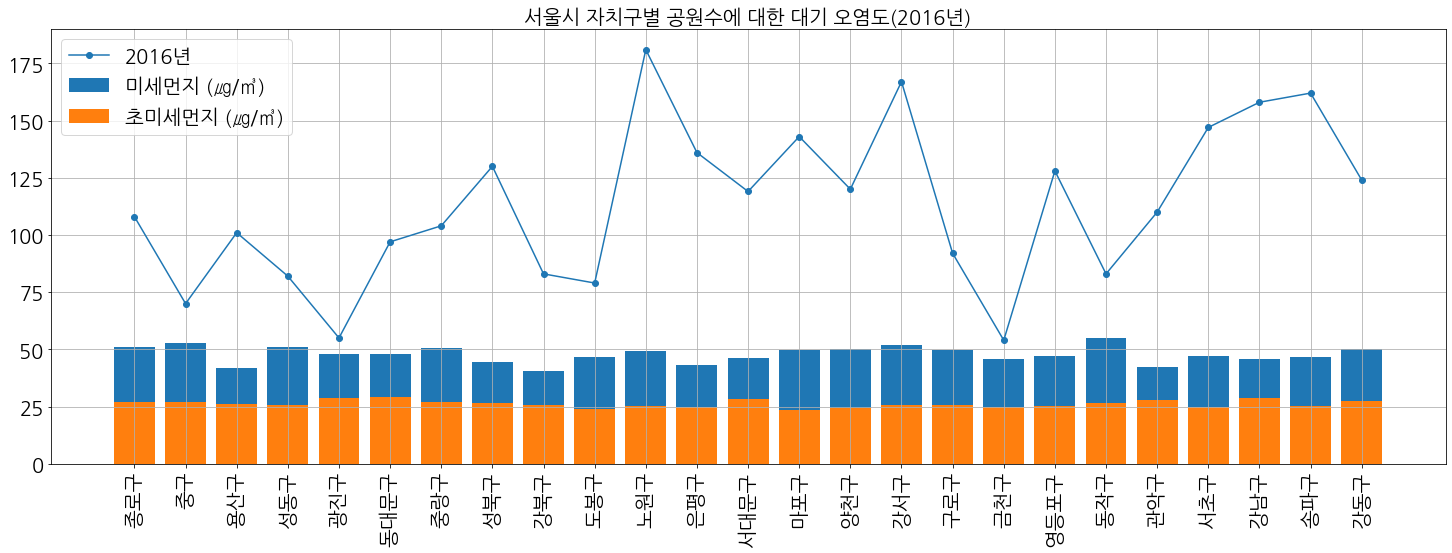

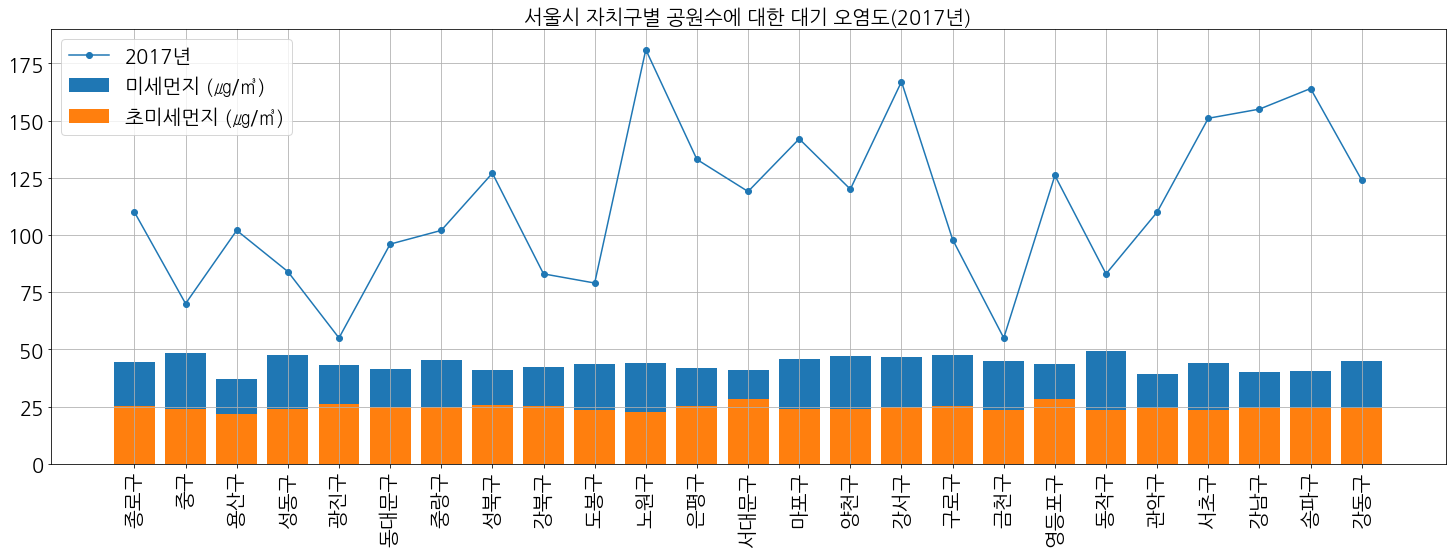

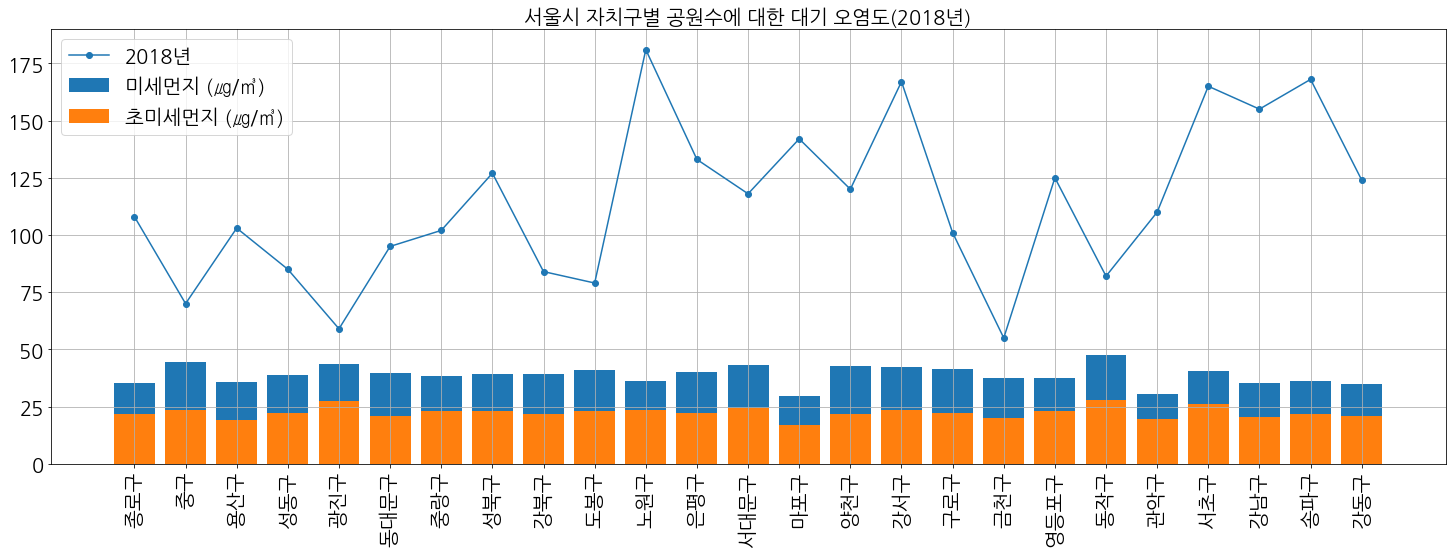

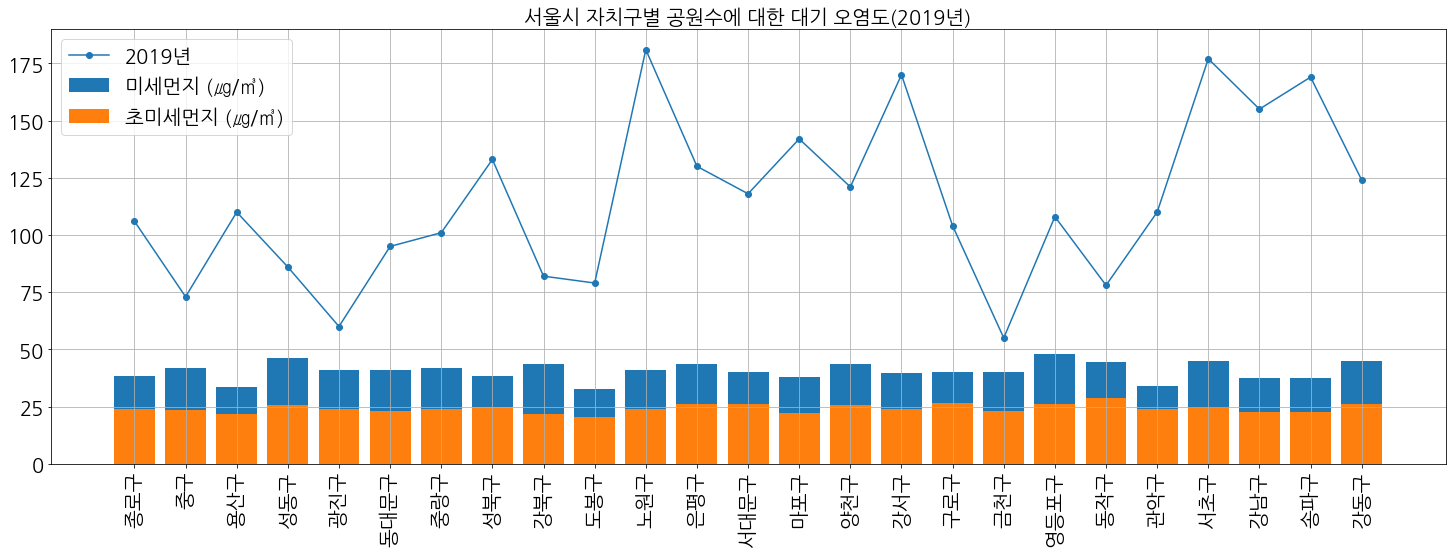

In [32]:
# 서울시 자치구별 공원수에 대한 대기 오염도 (2016 ~ 2020)
plt.figure(figsize=(25, 8))
plt.plot(pgu2016, pcount2016, 'o-', label='2016년')
plt.bar(dgu2016, dpm10mean2016, label='미세먼지 (㎍/㎥)')
plt.bar(dgu2016, dpm1mean2016, label='초미세먼지 (㎍/㎥)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 자치구별 공원수에 대한 대기 오염도(2016년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(pgu2017, pcount2017, 'o-', label='2017년')
plt.bar(dgu2017, dpm10mean2017, label='미세먼지 (㎍/㎥)')
plt.bar(dgu2017, dpm1mean2017, label='초미세먼지 (㎍/㎥)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 자치구별 공원수에 대한 대기 오염도(2017년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(pgu2018, pcount2018, 'o-', label='2018년')
plt.bar(dgu2018, dpm10mean2018, label='미세먼지 (㎍/㎥)')
plt.bar(dgu2018, dpm1mean2018, label='초미세먼지 (㎍/㎥)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 자치구별 공원수에 대한 대기 오염도(2018년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(pgu2019, pcount2019, 'o-', label='2019년')
plt.bar(dgu2019, dpm10mean2019, label='미세먼지 (㎍/㎥)')
plt.bar(dgu2019, dpm1mean2019, label='초미세먼지 (㎍/㎥)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 자치구별 공원수에 대한 대기 오염도(2019년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

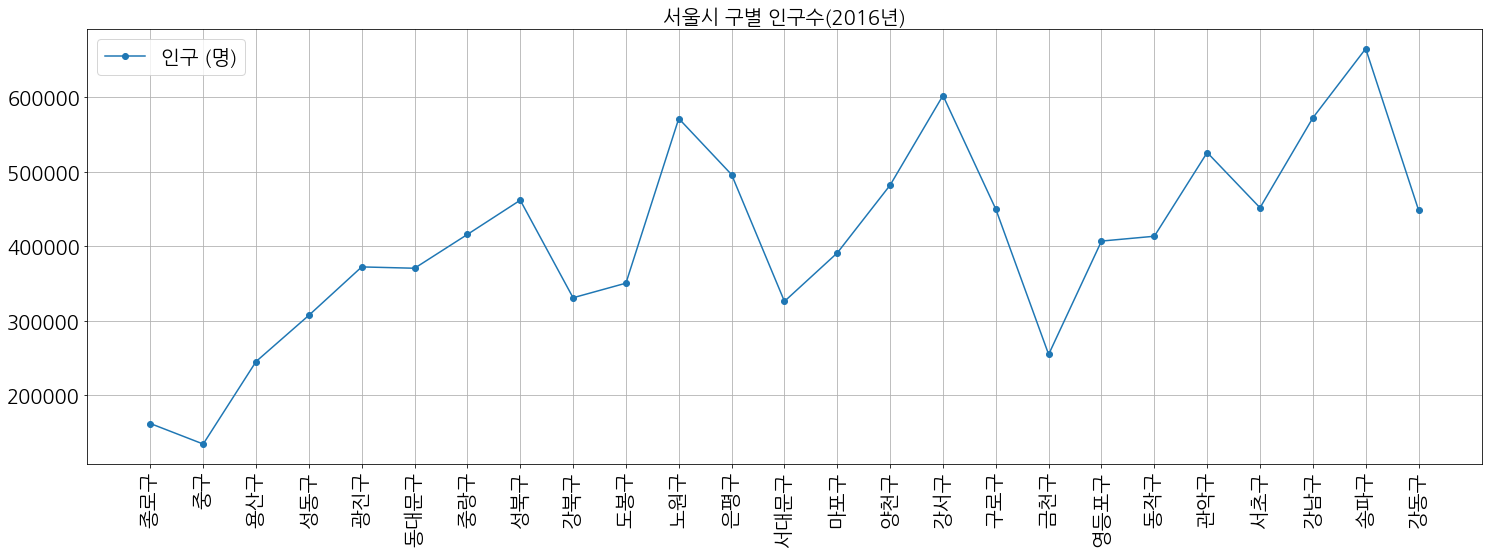

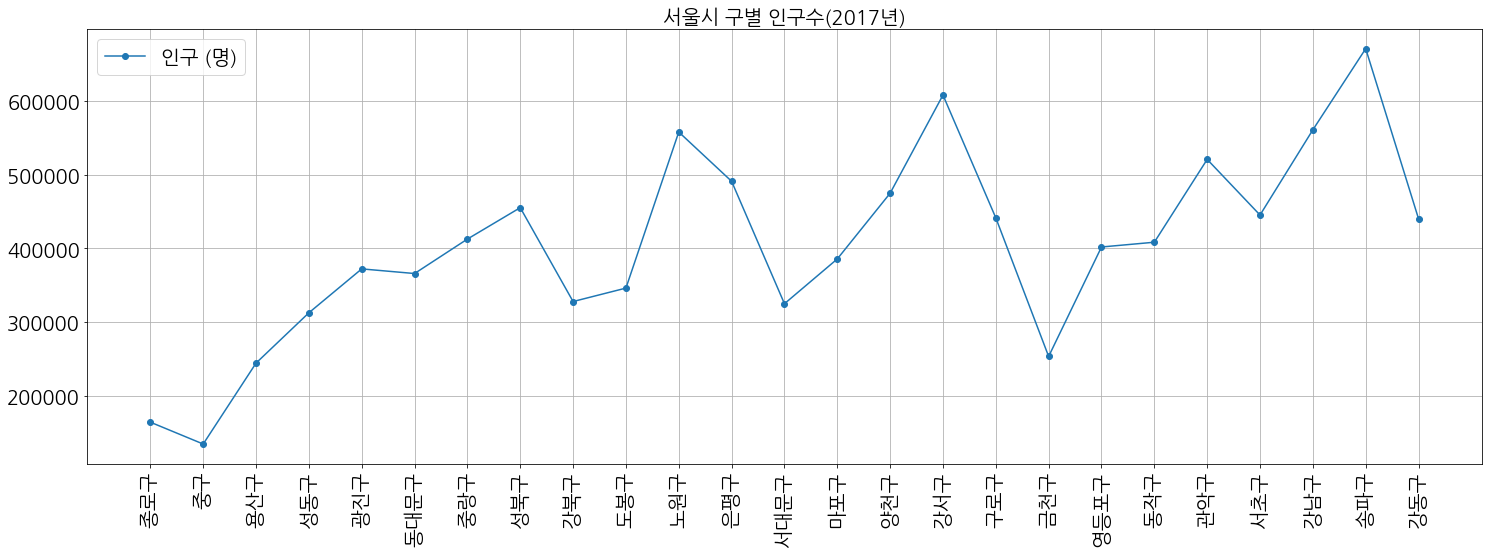

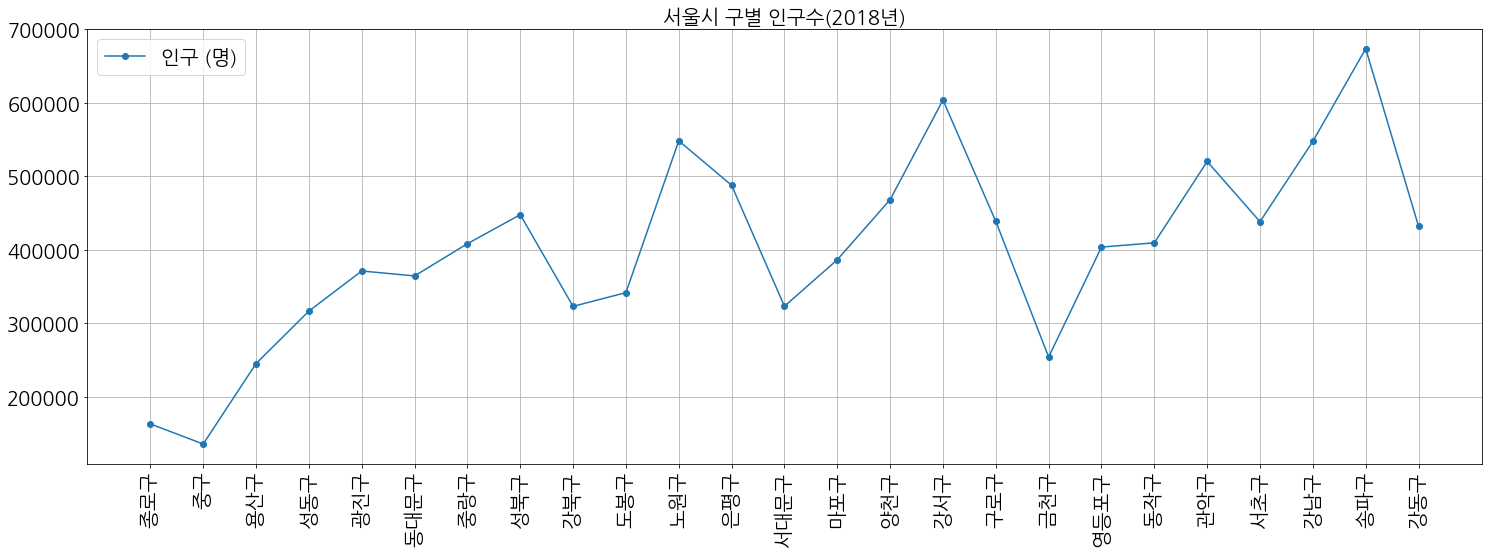

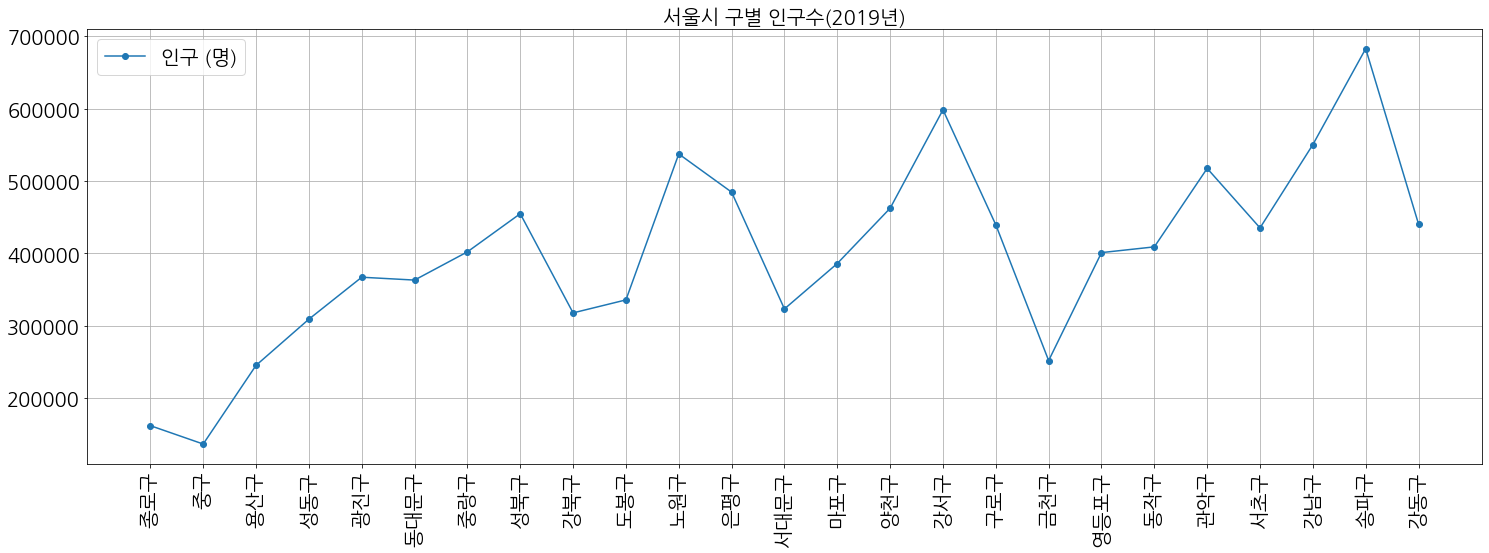

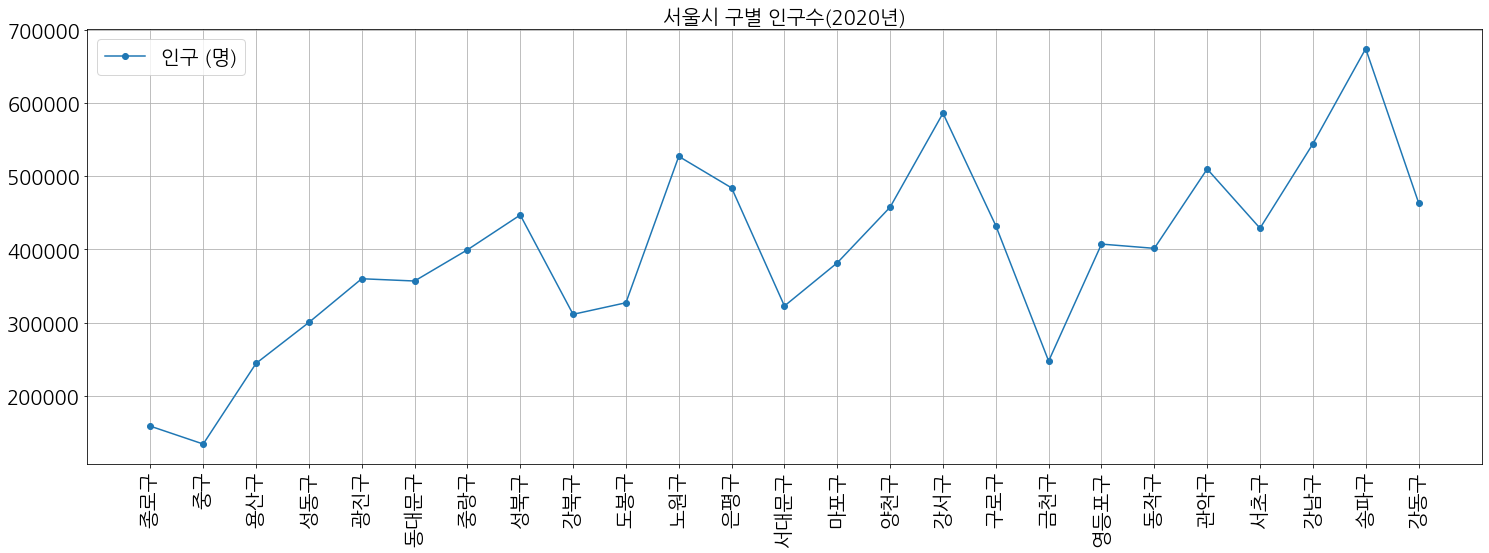

In [33]:
# 서울시 구별 인구수 (2016 ~ 2020)
plt.figure(figsize=(25, 8))
plt.plot(popgu2016, popcount2016, 'o-', label='인구 (명)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 구별 인구수(2016년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(popgu2017, popcount2017, 'o-', label='인구 (명)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 구별 인구수(2017년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(popgu2018, popcount2018, 'o-', label='인구 (명)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 구별 인구수(2018년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(popgu2019, popcount2019, 'o-', label='인구 (명)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 구별 인구수(2019년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

plt.figure(figsize=(25, 8))
plt.plot(popgu2020, popcount2020, 'o-', label='인구 (명)')
plt.legend(loc='best', fontsize=20)
plt.title('서울시 구별 인구수(2020년)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [35]:
# 데이터 적재
pop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/population.csv')
dust = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/dust.csv')
road_area = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/road_area.csv')
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/park.csv')
seoul_geo = '/content/drive/MyDrive/Colab Notebooks/data/seoul_gu.json'

In [36]:
# 지도 표현
# 서울특별시 구별 인구수
seoul = [37.60, 126.97]
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=pop, columns=['구별', '인구 (명)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 인구수').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/pop_map.html')
fmap

In [37]:
# 서울특별시 구별 인구 밀도
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=pop, columns=['구별', '인구밀도 (명/㎢)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 인구 밀도').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/den_map.html')
fmap

In [38]:
# 서울특별시 구별 도로 면적
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=road_area, columns=['자치구별', '도로면적 (㎢)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 도로 면적').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/road_area_map.html')
fmap

In [39]:
# 서울특별시 구별 도로율
fmap = folium.Map(seoul, zoom_start=11)

folium.Choropleth(geo_data=seoul_geo, data=road_area, columns=['자치구별', '도로율 (%)'],
                  key_on='feature.properties.SGG_NM', fill_color='YlOrBr',
                  fill_opacity=0.6, legend_name='서울특별시 구별 도로율').add_to(fmap)
fmap.save('/content/drive/MyDrive/Colab Notebooks/map/road_rate_map.html')
fmap